In [46]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [47]:
import torch
import torch.nn as nn

In [48]:
df= pd.read_csv("C:/Users/dasar/Downloads/Hotstarr.csv")
closed_prices = df["Close"]

In [49]:
seq_len = 15

In [52]:
mm = MinMaxScaler()
scaled_price = mm.fit_transform(np.array(closed_prices)[... , None]).squeeze()


X=[]
Y=[]

In [53]:
for i in range(len(scaled_price) - seq_len):
    X.append(scaled_price[i : i+ seq_len])
    Y.append(scaled_price[i+seq_len])

In [54]:
X = np.array(X)[... , None]
print(X)

[[[1.28939572e-03]
  [1.31064270e-03]
  [1.22788898e-03]
  ...
  [1.22229663e-03]
  [1.12724194e-03]
  [1.11158582e-03]]

 [[1.31064270e-03]
  [1.22788898e-03]
  [1.14401602e-03]
  ...
  [1.12724194e-03]
  [1.11158582e-03]
  [9.60616755e-04]]

 [[1.22788898e-03]
  [1.14401602e-03]
  [1.09369399e-03]
  ...
  [1.11158582e-03]
  [9.60616755e-04]
  [8.59969715e-04]]

 ...

 [[9.17648752e-01]
  [9.22110713e-01]
  [9.00317395e-01]
  ...
  [9.44029306e-01]
  [9.93283551e-01]
  [1.00000000e+00]]

 [[9.22110713e-01]
  [9.00317395e-01]
  [8.96732174e-01]
  ...
  [9.93283551e-01]
  [1.00000000e+00]
  [9.88649300e-01]]

 [[9.00317395e-01]
  [8.96732174e-01]
  [9.24146087e-01]
  ...
  [1.00000000e+00]
  [9.88649300e-01]
  [9.89917443e-01]]]


In [55]:
Y = np.array(Y)[... ,None]
print(Y)

[[9.60616755e-04]
 [8.59969715e-04]
 [8.42076297e-04]
 ...
 [9.88649300e-01]
 [9.89917443e-01]
 [9.81118701e-01]]


In [57]:
train_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
train_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()
test_x = torch.from_numpy(X[:int(0.8*X.shape[0])]).float()
test_y = torch.from_numpy(Y[:int(0.8*Y.shape[0])]).float()

In [58]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size):
        super().__init__()
        self.lstm = nn.LSTM(input_size , hidden_size,batch_first=True)
        self.fc=nn.Linear(hidden_size, 1)
    def forward(self , x):
        output,(hidden,cell)=self.lstm(x)
        return self.fc(hidden[-1,:])

In [59]:
model = Model(1,64)

In [60]:
optimizer=torch.optim.Adam(model.parameters(), lr=0.001)

In [61]:

loss_fn = nn.MSELoss()

In [64]:
num_epochs=50

In [65]:
for epoch in range(num_epochs):
    output = model(train_x)
    loss=loss_fn(output,train_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10==0 and epoch !=0:
        print(epoch , "epoch loss", loss.detach().numpy())

10 epoch loss 0.004339652
20 epoch loss 0.003687188
30 epoch loss 0.0022869478
40 epoch loss 0.0002696737


In [66]:
model.eval()
with torch.no_grad():
    output=model(test_x)

In [67]:
pred=mm.inverse_transform(output.numpy())
real=mm.inverse_transform(test_y.numpy())

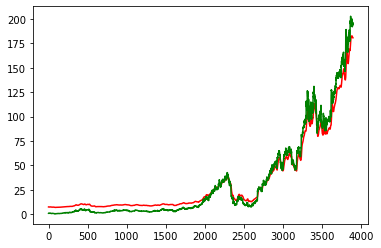

In [68]:
plt.plot(pred.squeeze(),color="red",label="predicted")
plt.plot(real.squeeze(),color="green",label="real")
plt.show()